In [101]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [102]:
dpw_beacon_raw_df = pd.read_csv("data/DPW beacon raw.csv")
mjf_beacon_raw_df = pd.read_csv("data/MJF beacon raw.csv")
pema_beacon_raw_df = pd.read_csv("data/PEMA beacon raw.csv")
pha_beacon_raw_df = pd.read_csv("data/PHA beacon raw.csv")

In [103]:
# dpw_beacon_raw_df.to_csv("del later.csv")

In [104]:
columns_to_keep = ["timestamp", "pm1", "pm25", "pm10", "co", "no", "no2", "o3", "rh", "temp"]
dpw_beacon_raw_df = dpw_beacon_raw_df[columns_to_keep]
mjf_beacon_raw_df = mjf_beacon_raw_df[columns_to_keep]
pema_beacon_raw_df = pema_beacon_raw_df[columns_to_keep]
pha_beacon_raw_df = pha_beacon_raw_df[columns_to_keep]

count    146600.000000
mean         26.494238
std           9.214880
min         -56.688000
25%          21.015000
50%          28.557000
75%          33.409000
max          48.236000
Name: o3, dtype: float64


Text(0, 0.5, 'Concentration (ppb)')

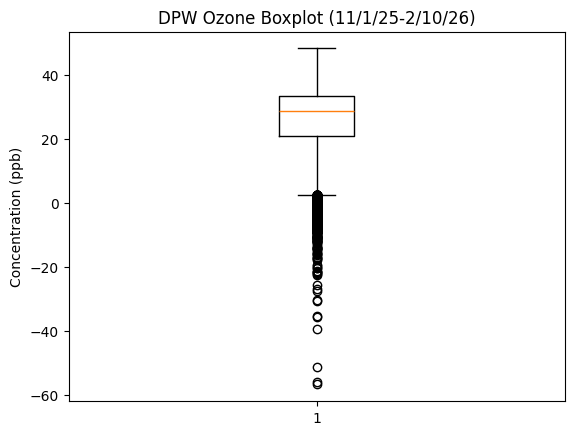

In [105]:
print(dpw_beacon_raw_df["o3"].describe())
plt.boxplot(dpw_beacon_raw_df["o3"])
plt.title("DPW Ozone Boxplot (11/1/25-2/10/26)")
plt.ylabel("Concentration (ppb)")

count    146586.000000
mean         36.273444
std           8.726230
min          -0.913000
25%          31.334000
50%          38.797000
75%          42.756000
max          56.539000
Name: o3, dtype: float64


Text(0, 0.5, 'Concentration (ppb)')

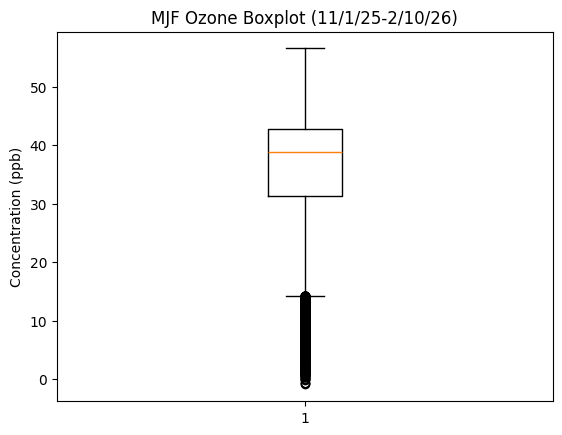

In [106]:
print(mjf_beacon_raw_df["o3"].describe())
plt.boxplot(mjf_beacon_raw_df["o3"])
plt.title("MJF Ozone Boxplot (11/1/25-2/10/26)")
plt.ylabel("Concentration (ppb)")

count    146383.000000
mean         20.733863
std          10.378858
min         -13.349000
25%          13.944500
50%          23.528000
75%          28.496000
max          47.419000
Name: o3, dtype: float64


Text(0, 0.5, 'Concentration (ppb)')

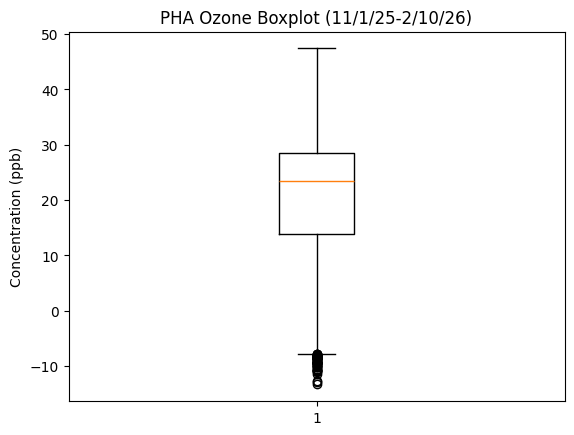

In [107]:
print(pha_beacon_raw_df["o3"].describe())
plt.boxplot(pha_beacon_raw_df["o3"].dropna())
plt.title("PHA Ozone Boxplot (11/1/25-2/10/26)")
plt.ylabel("Concentration (ppb)")

count    146208.000000
mean         23.354171
std          10.444220
min         -11.237000
25%          16.319000
50%          25.038000
75%          31.212000
max          52.227000
Name: o3, dtype: float64


Text(0, 0.5, 'Concentration (ppb)')

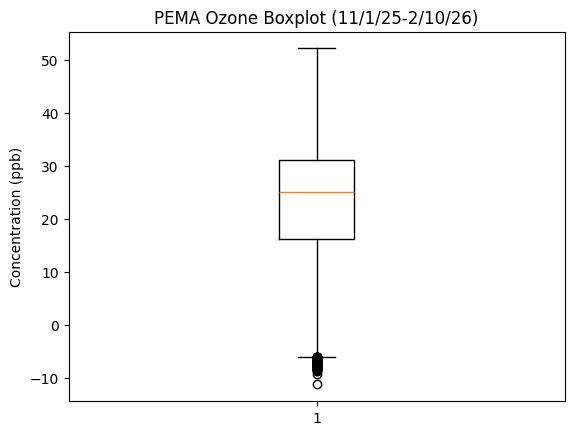

In [108]:
print(pema_beacon_raw_df["o3"].describe())
plt.boxplot(pema_beacon_raw_df["o3"].dropna())
plt.title("PEMA Ozone Boxplot (11/1/25-2/10/26)")
plt.ylabel("Concentration (ppb)")

In [109]:
dpw_beacon_raw_df.head()

,timestamp,pm1,pm25,pm10,co,no,no2,o3,rh,temp
0,2026-02-10T19:30:18Z,5.884,6.237,7.433,255.109,3.198,25.329,32.486,46.6,2.7
1,2026-02-10T19:29:18Z,6.157,6.506,14.282,272.475,2.271,24.522,31.379,46.4,2.7
2,2026-02-10T19:28:18Z,5.876,7.422,46.454,288.341,2.426,25.422,32.531,46.0,2.7
3,2026-02-10T19:27:18Z,6.107,6.487,15.879,284.732,3.044,25.530,31.215,45.3,2.7
4,2026-02-10T19:26:18Z,5.136,5.594,6.381,272.441,2.735,25.623,32.171,44.7,2.7


In [110]:
total_values = len(dpw_beacon_raw_df)
neg_count = (dpw_beacon_raw_df["o3"] < 0).sum()
neg_percent = (neg_count / total_values) * 100

str_tp_dpw = "Percentage negative values at DPW: " + str(neg_percent) + "%"
print(str_tp_dpw)
str_tp2_dpw = "Total negative values at DPW: " + str(neg_count) + "/" + str(total_values)
print(str_tp2_dpw)
print("")


total_values = len(mjf_beacon_raw_df)
neg_count = (mjf_beacon_raw_df["o3"] < 0).sum()
neg_percent = (neg_count / total_values) * 100

str_tp_mjf = "Percentage negative values at MJF: " + str(neg_percent) + "%"
print(str_tp_mjf)
str_tp2_mjf = "Total negative values at MJF: " + str(neg_count) + "/" + str(total_values)
print(str_tp2_mjf)
print("")



total_values = len(pema_beacon_raw_df)
neg_count = (pema_beacon_raw_df["o3"] < 0).sum()
neg_percent = (neg_count / total_values) * 100

str_tp_pema = "Percentage negative values at PEMA: " + str(neg_percent) + "%"
print(str_tp_pema)
str_tp2_pema = "Total negative values at PEMA: " + str(neg_count) + "/" + str(total_values)
print(str_tp2_pema)
print("")



total_values = len(pha_beacon_raw_df)
neg_count = (pha_beacon_raw_df["o3"] < 0).sum()
neg_percent = (neg_count / total_values) * 100

str_tp_pha = "Percentage negative values at PHA: " + str(neg_percent) + "%"
print(str_tp_pha)
str_tp2_pha = "Total negative values at PHA: " + str(neg_count) + "/" + str(total_values)
print(str_tp2_pha)
print("")

Percentage negative values at DPW: 0.3888130968622101%
Total negative values at DPW: 570/146600

Percentage negative values at MJF: 0.002728773552726727%
Total negative values at MJF: 4/146586

Percentage negative values at PEMA: 1.3248918664465335%
Total negative values at PEMA: 1942/146578

Percentage negative values at PHA: 3.3099345789929666%
Total negative values at PHA: 4852/146589



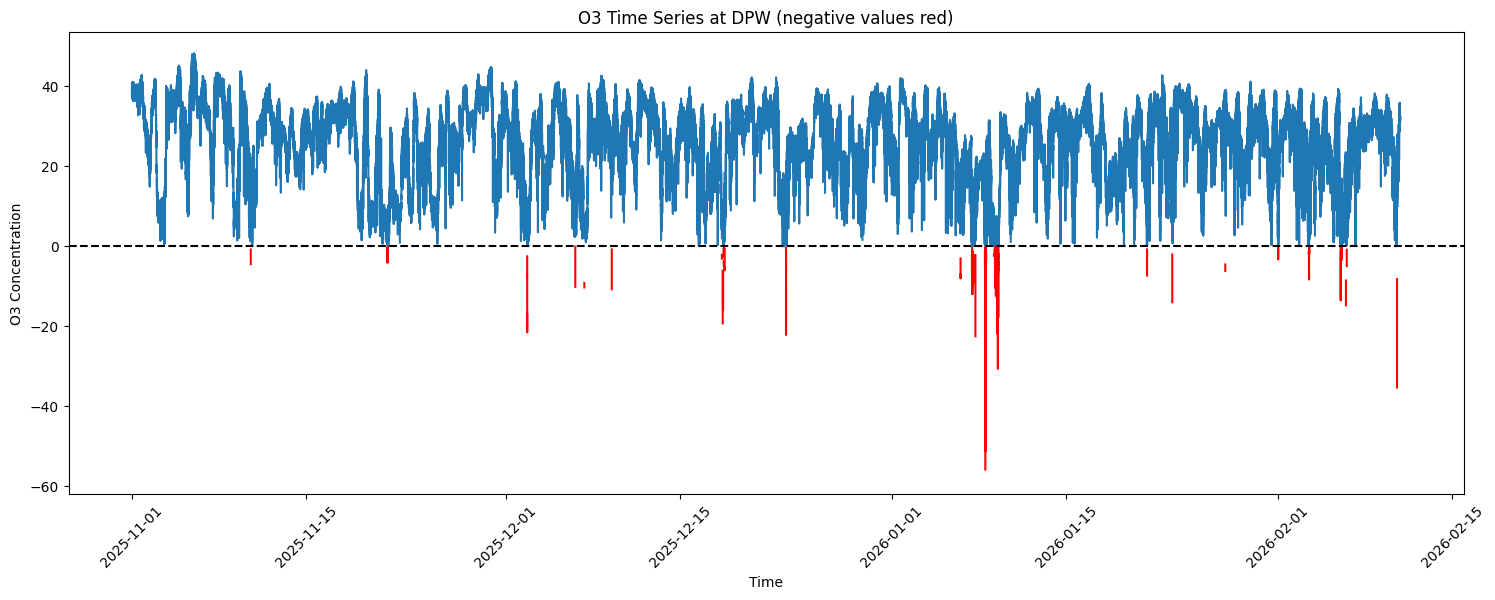

In [111]:
dpw_df_copy = dpw_beacon_raw_df.copy()

dpw_df_copy["timestamp"] = pd.to_datetime(dpw_df_copy["timestamp"], utc=True)
dpw_df_copy = dpw_df_copy.sort_values("timestamp")

o3_pos = dpw_df_copy["o3"].where(dpw_df_copy["o3"] >= 0)
o3_neg = dpw_df_copy["o3"].where(dpw_df_copy["o3"] < 0)

plt.figure(figsize=(18,6))
plt.plot(dpw_df_copy["timestamp"], o3_pos)
plt.plot(dpw_df_copy["timestamp"], o3_neg, color="red")

plt.xlabel("Time")
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle="--", color="black")
plt.ylabel("O3 Concentration")
plt.title("O3 Time Series at DPW (negative values red)")

plt.show()

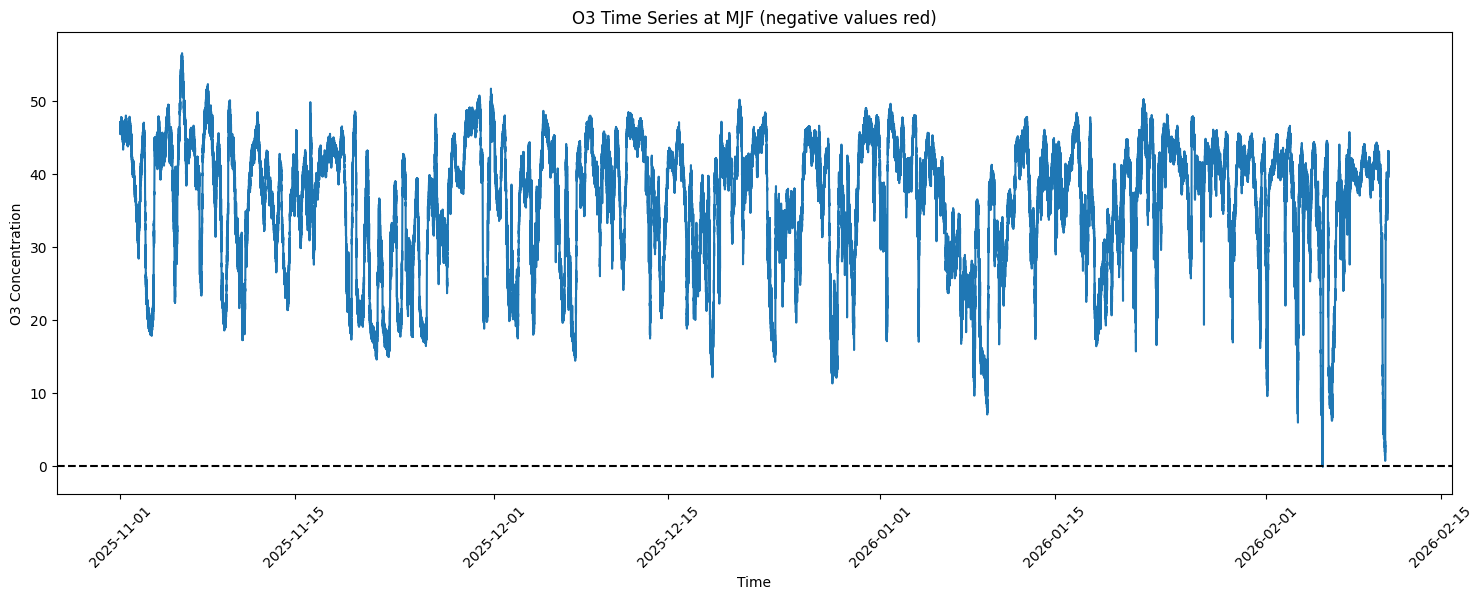

In [112]:
mjf_df_copy = mjf_beacon_raw_df.copy()

mjf_df_copy["timestamp"] = pd.to_datetime(mjf_df_copy["timestamp"], utc=True)
mjf_df_copy = mjf_df_copy.sort_values("timestamp")

o3_pos = mjf_df_copy["o3"].where(mjf_df_copy["o3"] >= 0)
o3_neg = mjf_df_copy["o3"].where(mjf_df_copy["o3"] < 0)

plt.figure(figsize=(18,6))
plt.plot(mjf_df_copy["timestamp"], o3_pos)
plt.plot(mjf_df_copy["timestamp"], o3_neg, color="red")

plt.xlabel("Time")
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle="--", color="black")
plt.ylabel("O3 Concentration")
plt.title("O3 Time Series at MJF (negative values red)")

plt.show()

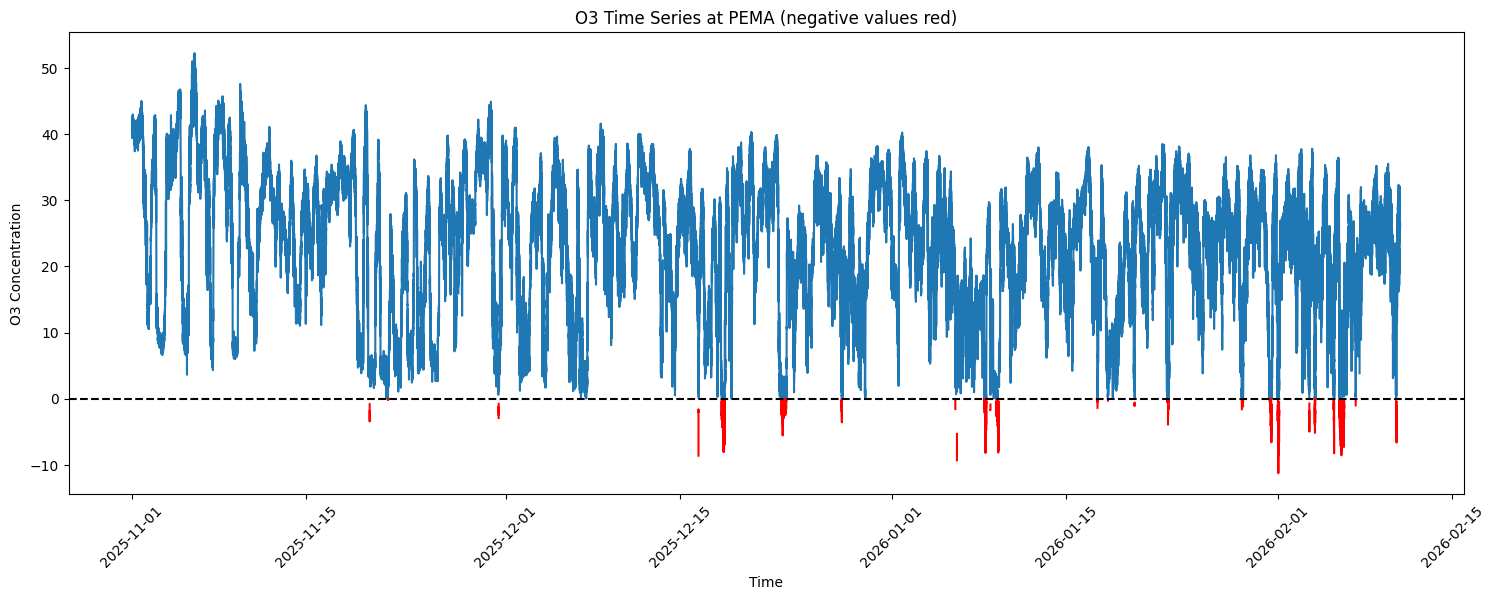

In [113]:
pema_df_copy = pema_beacon_raw_df.copy()

pema_df_copy["timestamp"] = pd.to_datetime(pema_df_copy["timestamp"], utc=True)
pema_df_copy = pema_df_copy.sort_values("timestamp")

o3_pos = pema_df_copy["o3"].where(pema_df_copy["o3"] >= 0)
o3_neg = pema_df_copy["o3"].where(pema_df_copy["o3"] < 0)

plt.figure(figsize=(18,6))
plt.plot(pema_df_copy["timestamp"], o3_pos)
plt.plot(pema_df_copy["timestamp"], o3_neg, color="red")

plt.xlabel("Time")
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle="--", color="black")
plt.ylabel("O3 Concentration")
plt.title("O3 Time Series at PEMA (negative values red)")

plt.show()

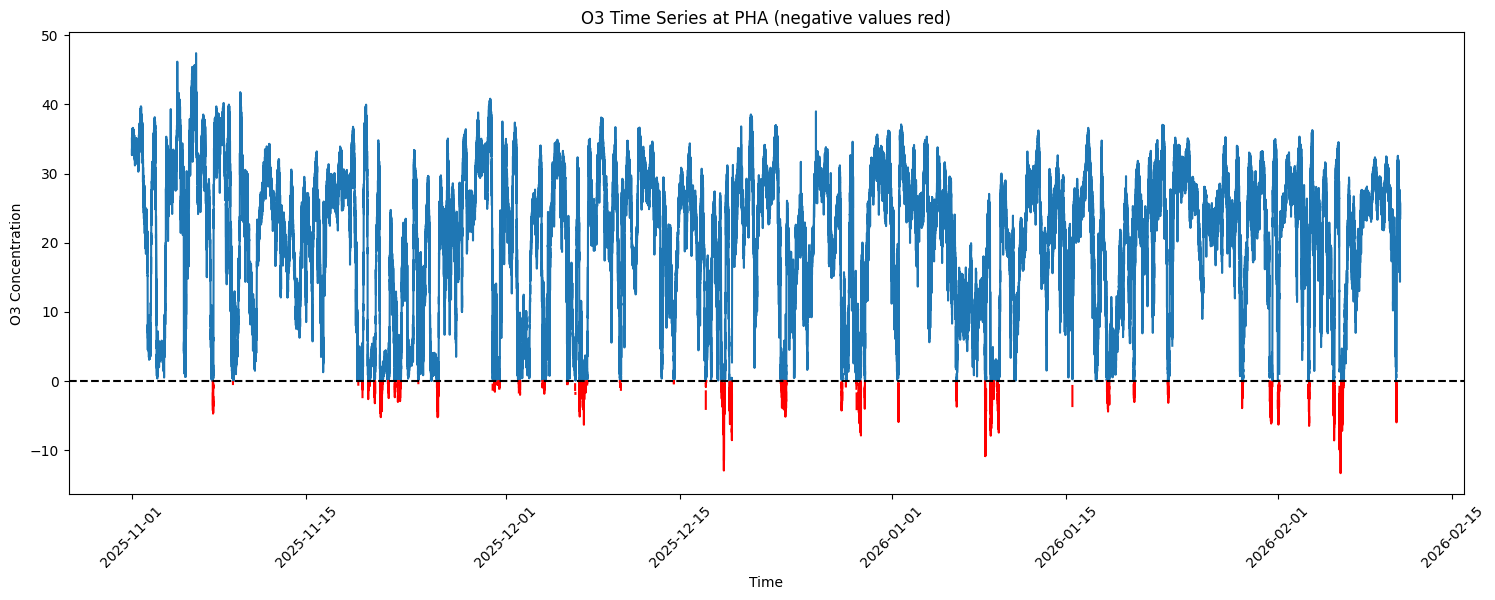

In [114]:
pha_df_copy = pha_beacon_raw_df.copy()

pha_df_copy["timestamp"] = pd.to_datetime(pha_df_copy["timestamp"], utc=True)
pha_df_copy = pha_df_copy.sort_values("timestamp")

o3_pos = pha_df_copy["o3"].where(pha_df_copy["o3"] >= 0)
o3_neg = pha_df_copy["o3"].where(pha_df_copy["o3"] < 0)

plt.figure(figsize=(18,6))
plt.plot(pha_df_copy["timestamp"], o3_pos)
plt.plot(pha_df_copy["timestamp"], o3_neg, color="red")

plt.xlabel("Time")
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle="--", color="black")
plt.ylabel("O3 Concentration")
plt.title("O3 Time Series at PHA (negative values red)")

plt.show()

In [115]:
dpw_beacon_raw_df.head()

,timestamp,pm1,pm25,pm10,co,no,no2,o3,rh,temp
0,2026-02-10T19:30:18Z,5.884,6.237,7.433,255.109,3.198,25.329,32.486,46.6,2.7
1,2026-02-10T19:29:18Z,6.157,6.506,14.282,272.475,2.271,24.522,31.379,46.4,2.7
2,2026-02-10T19:28:18Z,5.876,7.422,46.454,288.341,2.426,25.422,32.531,46.0,2.7
3,2026-02-10T19:27:18Z,6.107,6.487,15.879,284.732,3.044,25.530,31.215,45.3,2.7
4,2026-02-10T19:26:18Z,5.136,5.594,6.381,272.441,2.735,25.623,32.171,44.7,2.7


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


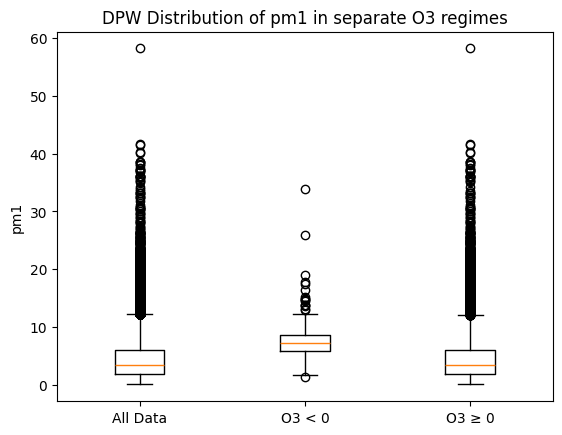

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


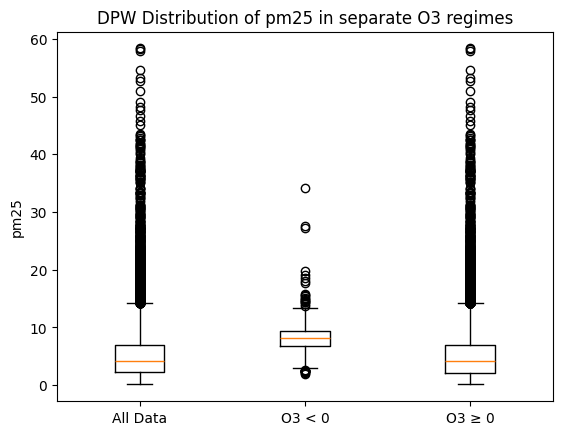

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


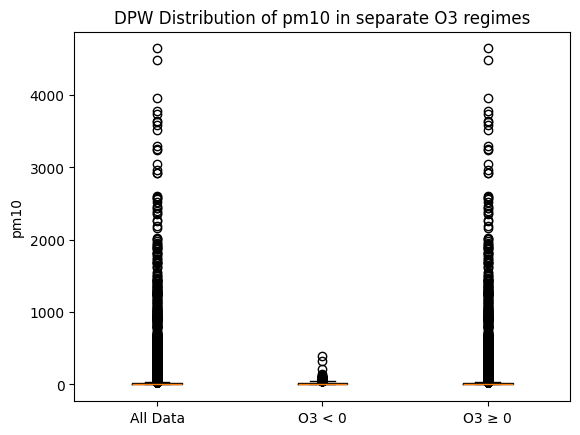

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


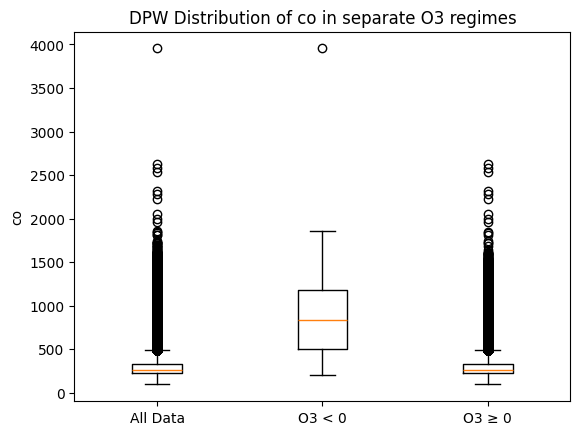

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


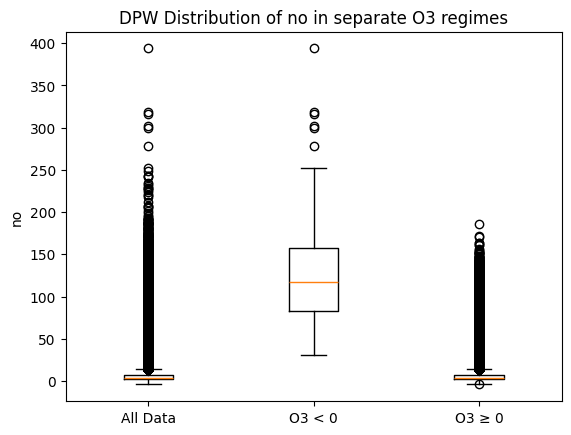

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


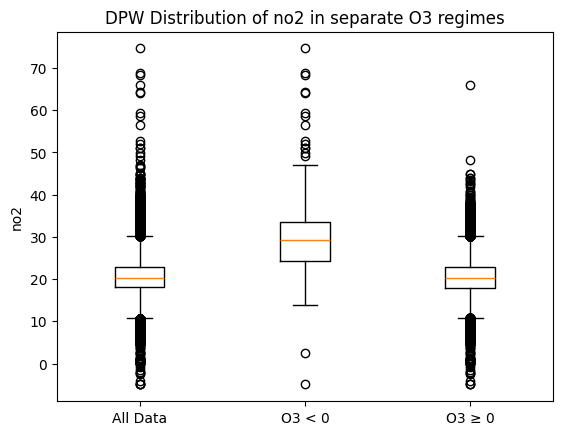

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


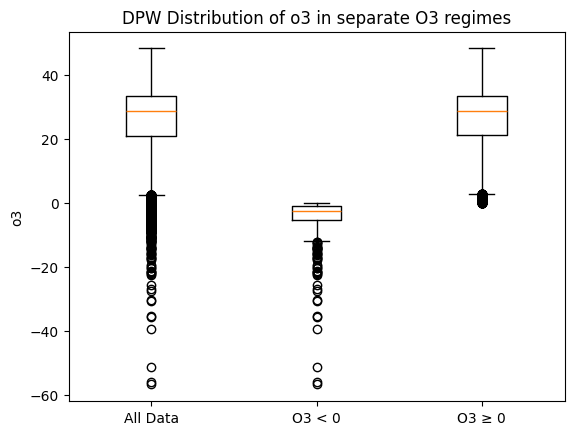

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


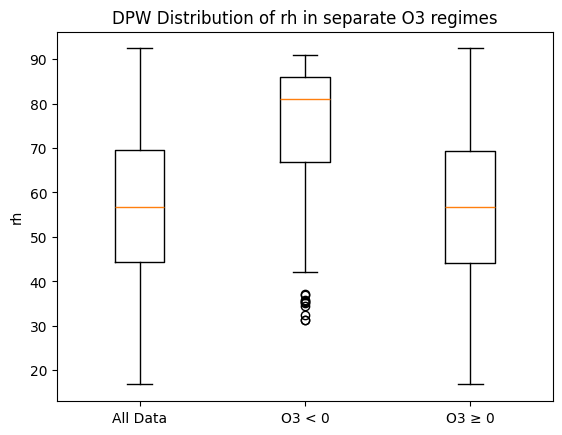

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/156131897.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


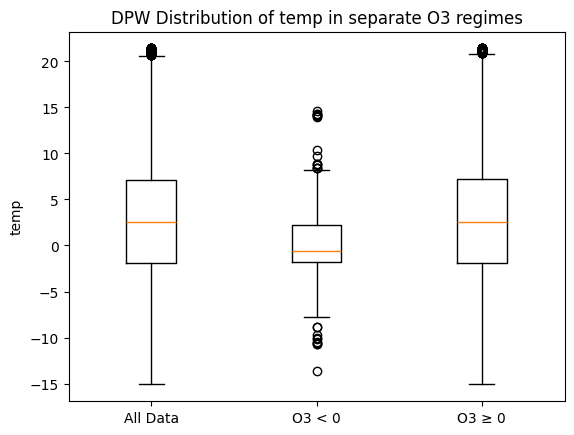

In [116]:
dpw_df_c = dpw_beacon_raw_df.copy()

vars_to_plot = ["pm1", "pm25", "pm10", "co", "no", "no2", "o3", "rh", "temp"]

mask_neg_o3 = dpw_df_c["o3"] < 0
mask_pos_o3 = dpw_df_c["o3"] >= 0

for var in vars_to_plot:
    all_data = dpw_df_c[var].dropna()
    neg_o3_data = dpw_df_c.loc[mask_neg_o3, var].dropna()
    pos_o3_data = dpw_df_c.loc[mask_pos_o3, var].dropna()

    plt.figure()

    plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)

    plt.ylabel(var)
    plt.title("DPW Distribution of " + str(var) + " in separate O3 regimes")

    plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


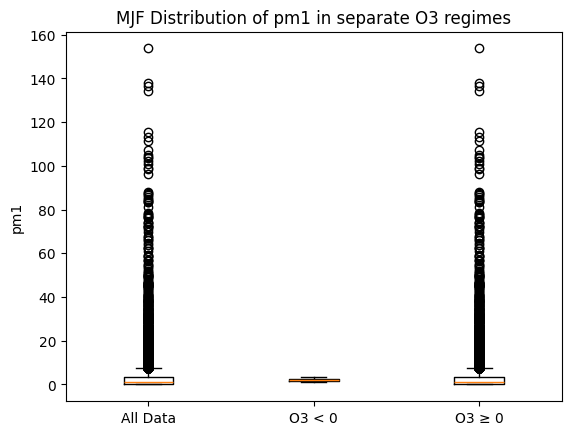

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


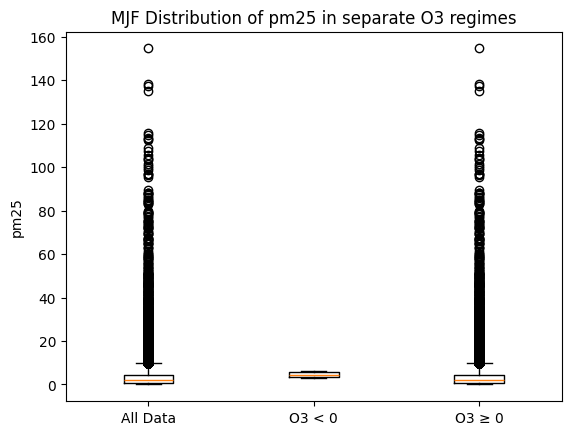

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


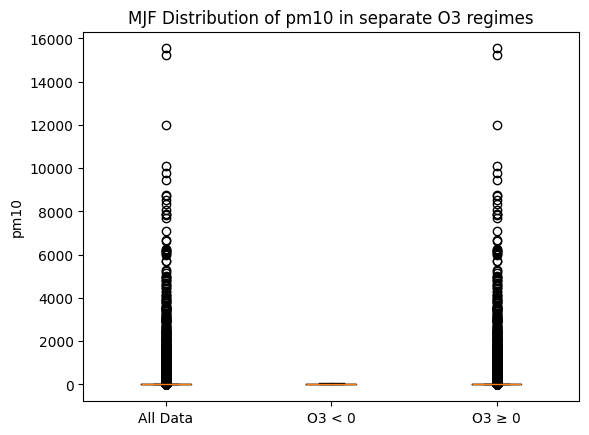

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


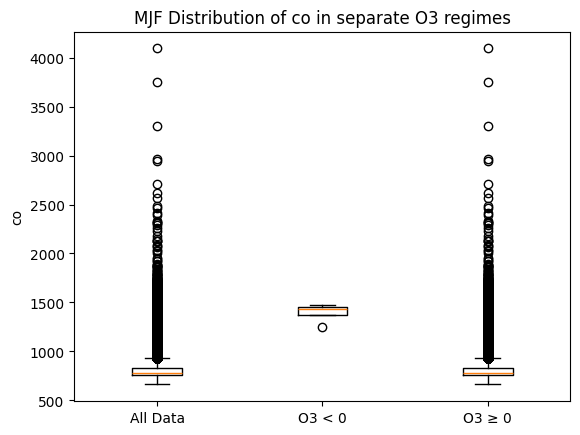

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


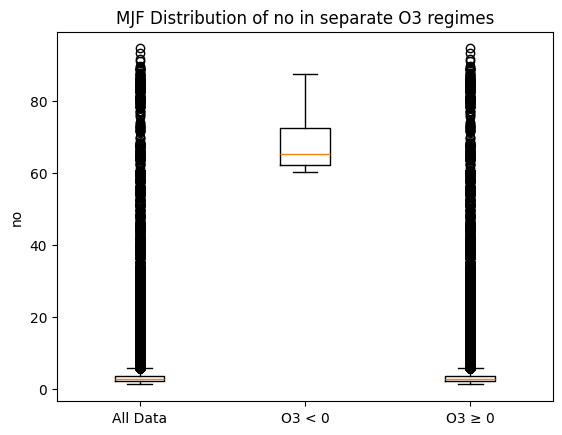

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


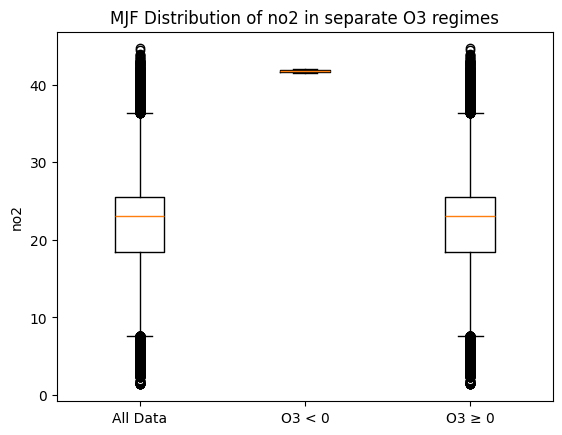

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


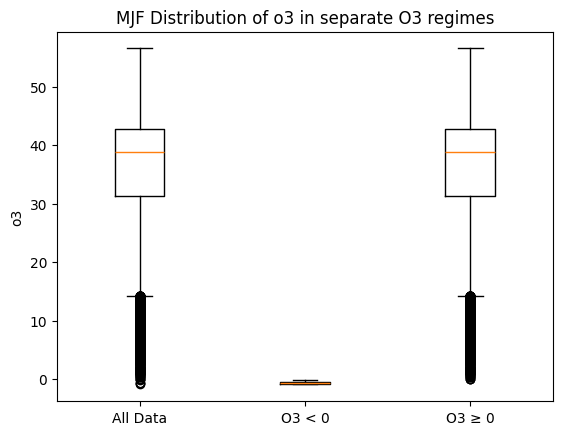

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


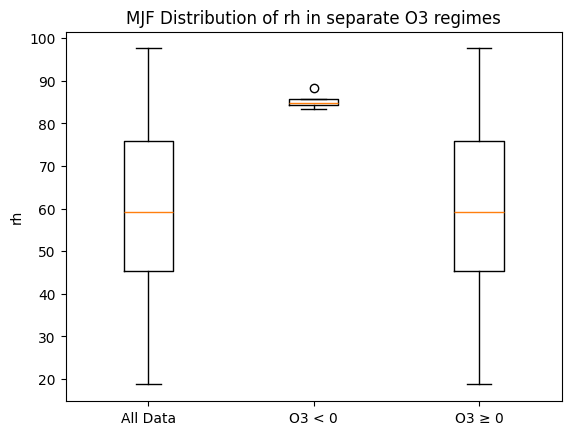

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/2836315206.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 ≥ 0"], showfliers=True)


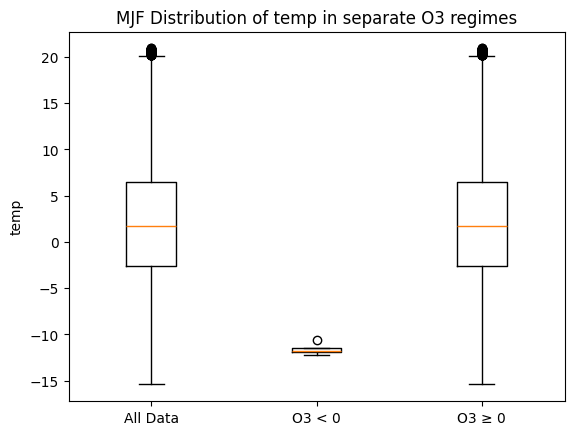

In [117]:
mjf_df_c = mjf_beacon_raw_df.copy()

vars_to_plot = ["pm1", "pm25", "pm10", "co", "no", "no2", "o3", "rh", "temp"]

mask_neg_o3 = mjf_df_c["o3"] < 0
mask_pos_o3 = mjf_df_c["o3"] >= 0

for var in vars_to_plot:
    all_data = mjf_df_c[var].dropna()
    neg_o3_data = mjf_df_c.loc[mask_neg_o3, var].dropna()
    pos_o3_data = mjf_df_c.loc[mask_pos_o3, var].dropna()

    plt.figure()

    plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)

    plt.ylabel(var)
    plt.title("MJF Distribution of " + str(var) + " in separate O3 regimes")

    plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


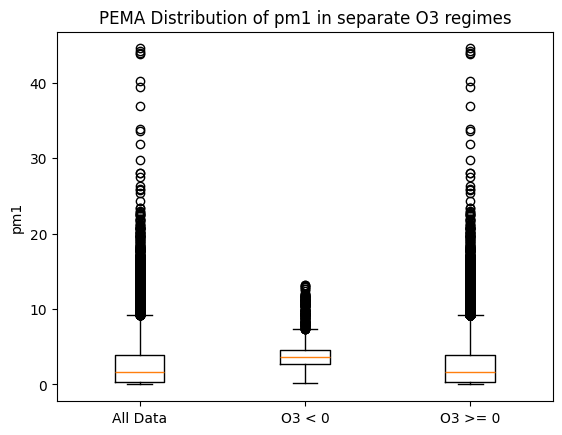

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


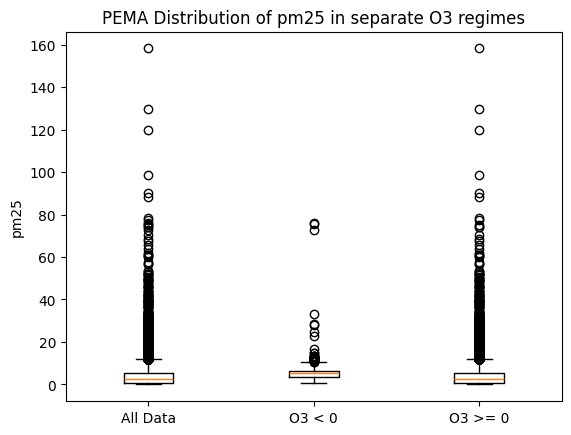

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


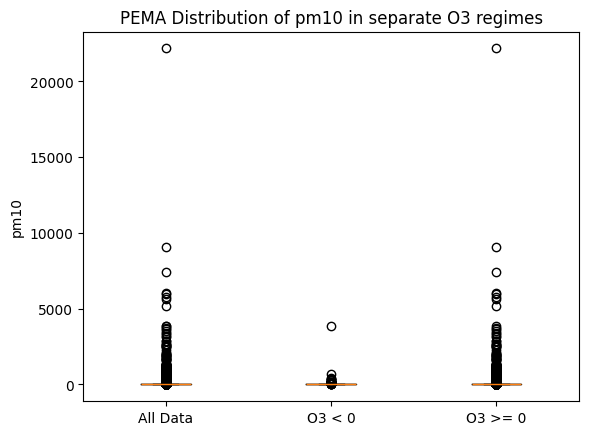

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


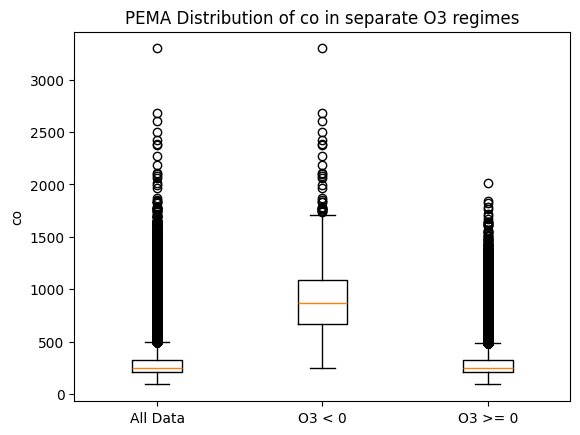

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


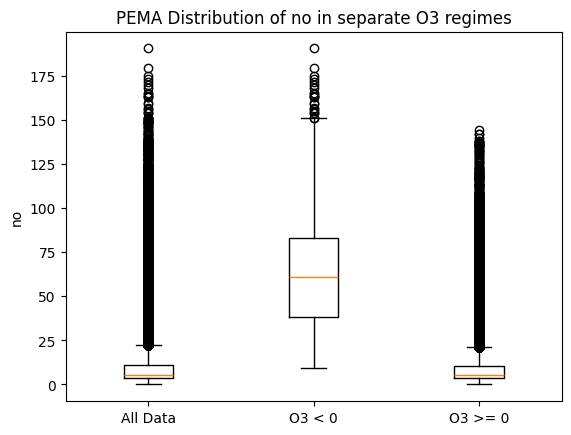

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


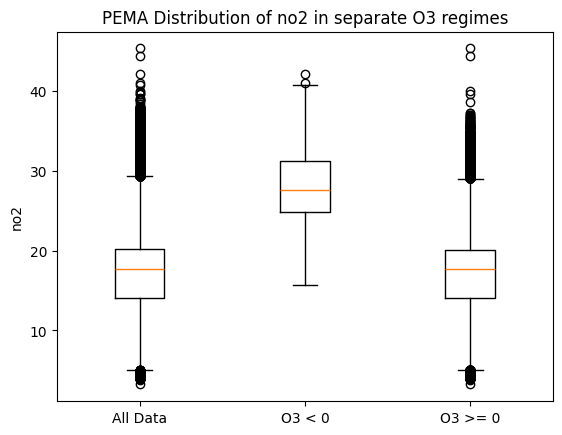

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


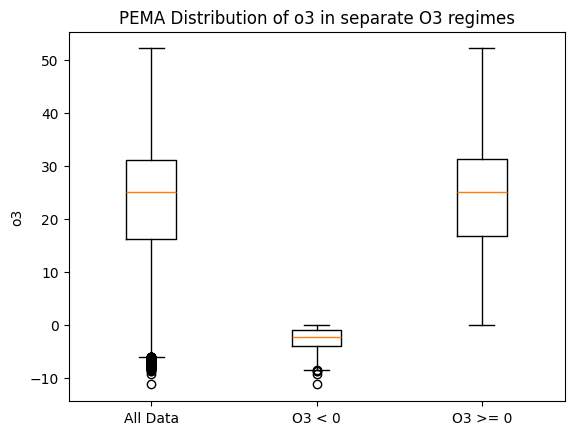

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


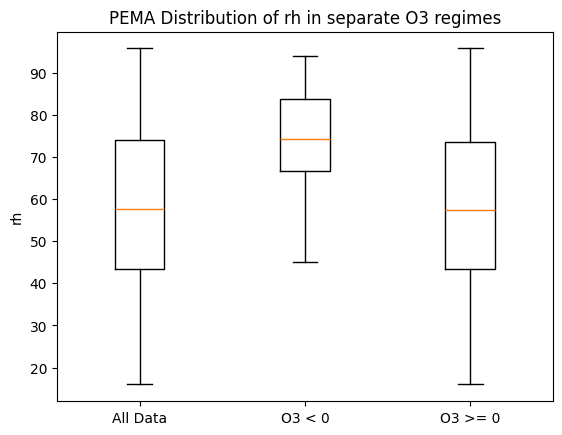

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1456753979.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


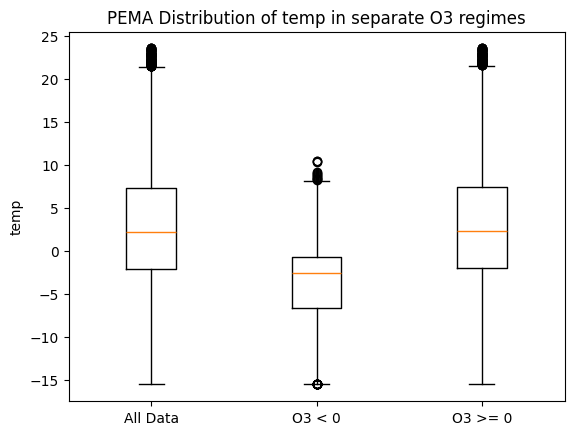

In [119]:
pema_df_c = pema_beacon_raw_df.copy()

vars_to_plot = ["pm1", "pm25", "pm10", "co", "no", "no2", "o3", "rh", "temp"]

mask_neg_o3 = pema_df_c["o3"] < 0
mask_pos_o3 = pema_df_c["o3"] >= 0

for var in vars_to_plot:
    all_data = pema_df_c[var].dropna()
    neg_o3_data = pema_df_c.loc[mask_neg_o3, var].dropna()
    pos_o3_data = pema_df_c.loc[mask_pos_o3, var].dropna()

    plt.figure()

    plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)

    plt.ylabel(var)
    plt.title("PEMA Distribution of " + str(var) + " in separate O3 regimes")

    plt.show()


/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


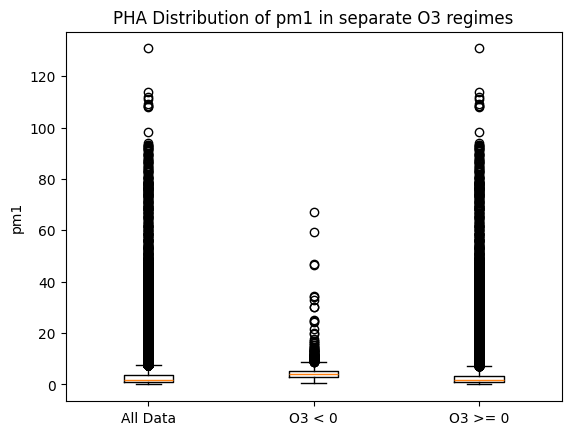

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


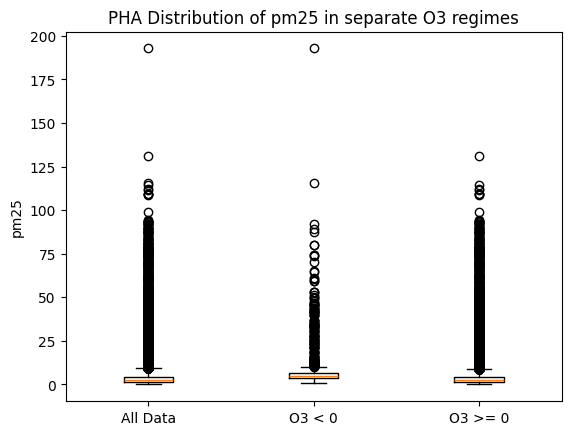

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


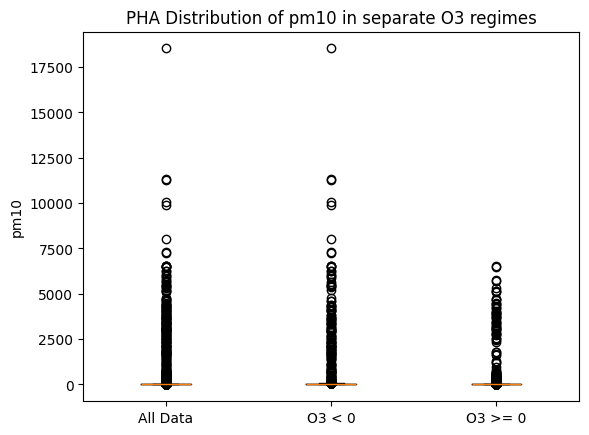

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


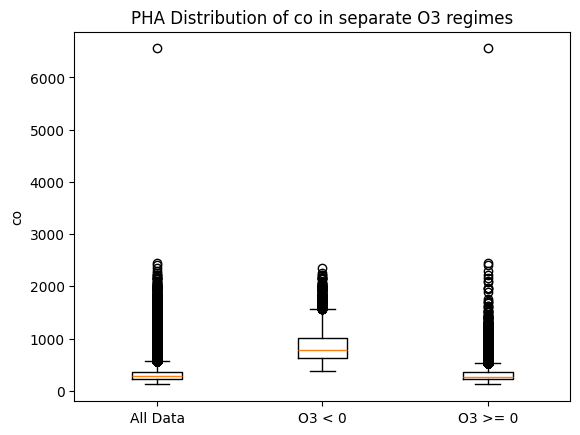

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


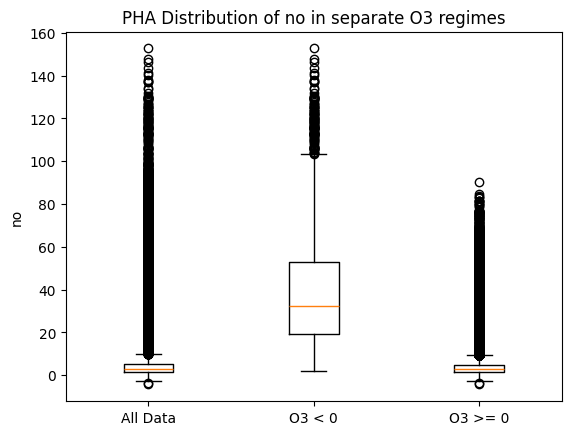

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


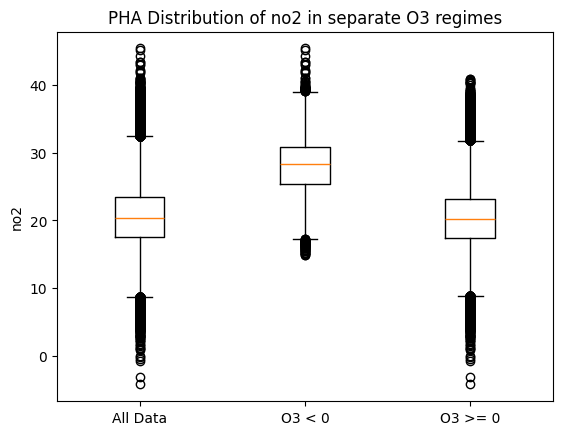

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


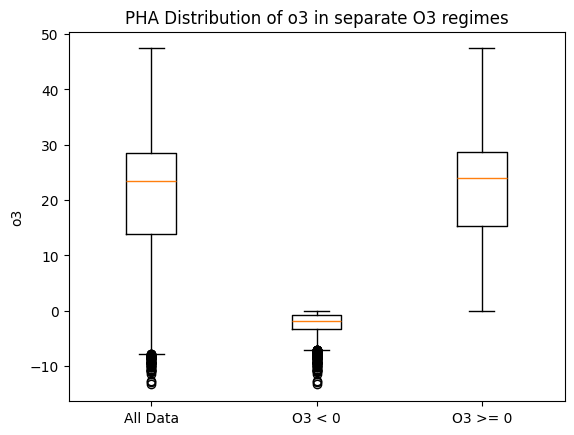

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


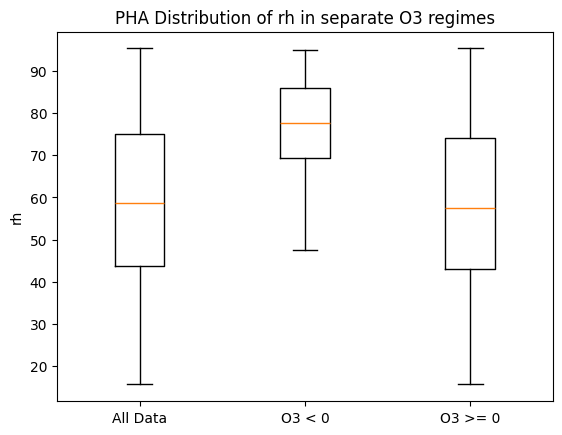

/var/folders/cv/16s476bd69z2kjqnmm06ls5c0000gn/T/ipykernel_16566/1925785381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)


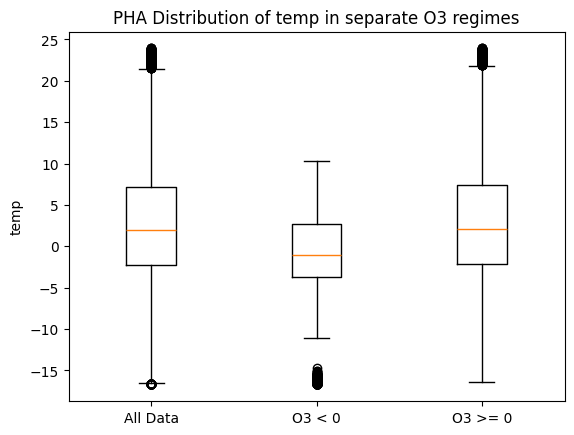

In [120]:
pha_df_c = pha_beacon_raw_df.copy()

vars_to_plot = ["pm1", "pm25", "pm10", "co", "no", "no2", "o3", "rh", "temp"]

mask_neg_o3 = pha_df_c["o3"] < 0
mask_pos_o3 = pha_df_c["o3"] >= 0

for var in vars_to_plot:
    all_data = pha_df_c[var].dropna()
    neg_o3_data = pha_df_c.loc[mask_neg_o3, var].dropna()
    pos_o3_data = pha_df_c.loc[mask_pos_o3, var].dropna()

    plt.figure()

    plt.boxplot([all_data, neg_o3_data, pos_o3_data], labels=["All Data", "O3 < 0", "O3 >= 0"], showfliers=True)

    plt.ylabel(var)
    plt.title("PHA Distribution of " + str(var) + " in separate O3 regimes")

    plt.show()
